In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.constraints import max_norm, MinMaxNorm

Using TensorFlow backend.


In [3]:
def func1(x):
    return x**2*(np.abs(x)<=2) + 4*(np.abs(x)>2)

def func2(x):
    return - x**2*(np.abs(x)<=2) - 4*(np.abs(x)>2)
    
    
Xtest = np.arange(-5, 5, 0.1)
Ytest1 = func1(Xtest)
Ytest2 = func2(Xtest)

Xlearn = np.random.uniform(-5, 5, size=(200))
Ylearn1 = func1(Xlearn) + 0.1*np.random.normal(0,1,len(Xlearn))
Ylearn2 = func2(Xlearn) + 0.1*np.random.normal(0,1,len(Xlearn))

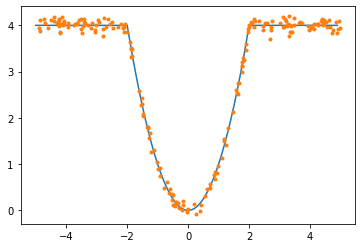

In [4]:
plt.plot(Xtest, Ytest1)
plt.plot(Xlearn, Ylearn1, '.', label='Raw input data with noise')
plt.show()

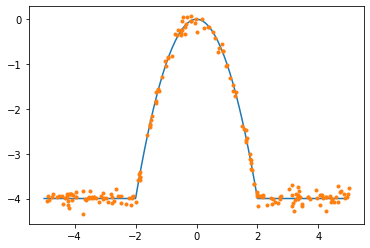

In [5]:
plt.plot(Xtest, Ytest2)
plt.plot(Xlearn, Ylearn2, '.', label='Raw input data with noise')
plt.show()

In [6]:
model1 = Sequential()
model1.add(Dense(8, input_dim=1, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(Dense(128, activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(Dense(1, activation='linear'))
model1.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [7]:
nepoch = 100
nbatch = 10
model1.fit(Xlearn, Ylearn1, epochs=nepoch, batch_size=nbatch)

Epoch 1/100
200/200 [==============================] - 1s 5ms/step - loss: 7.6330 - mse: 7.6330
Epoch 2/100
200/200 [==============================] - 0s 235us/step - loss: 4.0905 - mse: 4.0905
Epoch 3/100
200/200 [==============================] - 0s 229us/step - loss: 1.5679 - mse: 1.5679
Epoch 4/100
200/200 [==============================] - 0s 264us/step - loss: 0.8025 - mse: 0.8025
Epoch 5/100
200/200 [==============================] - 0s 222us/step - loss: 0.8290 - mse: 0.8290
Epoch 6/100
200/200 [==============================] - 0s 298us/step - loss: 0.7351 - mse: 0.7351
Epoch 7/100
200/200 [==============================] - 0s 206us/step - loss: 0.7634 - mse: 0.7634
Epoch 8/100
200/200 [==============================] - 0s 217us/step - loss: 0.7419 - mse: 0.7419
Epoch 9/100
200/200 [==============================] - 0s 285us/step - loss: 0.6418 - mse: 0.6418
Epoch 10/100
200/200 [==============================] - 0s 210us/step - loss: 0.6371 - mse: 0.6371
Epoch 11/100
200/200 

200/200 [==============================] - 0s 229us/step - loss: 0.1044 - mse: 0.1044
Epoch 84/100
200/200 [==============================] - 0s 233us/step - loss: 0.1160 - mse: 0.1160
Epoch 85/100
200/200 [==============================] - 0s 223us/step - loss: 0.0960 - mse: 0.0960
Epoch 86/100
200/200 [==============================] - 0s 213us/step - loss: 0.1098 - mse: 0.1098
Epoch 87/100
200/200 [==============================] - 0s 204us/step - loss: 0.1453 - mse: 0.1453
Epoch 88/100
200/200 [==============================] - 0s 220us/step - loss: 0.1077 - mse: 0.1077
Epoch 89/100
200/200 [==============================] - 0s 197us/step - loss: 0.0809 - mse: 0.0809
Epoch 90/100
200/200 [==============================] - 0s 201us/step - loss: 0.0873 - mse: 0.0873
Epoch 91/100
200/200 [==============================] - 0s 203us/step - loss: 0.1046 - mse: 0.1046
Epoch 92/100
200/200 [==============================] - 0s 205us/step - loss: 0.0986 - mse: 0.0986
Epoch 93/100
200/200 [=

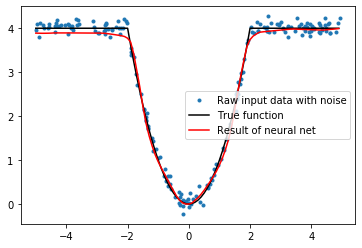

In [7]:
Ylearned1 = model1.predict(Xtest)

plt.plot(Xlearn, Ylearn1, '.', label='Raw input data with noise')
plt.plot(Xtest, Ytest1, label='True function', c='black')
plt.plot(Xtest, Ylearned1, label='Result of neural net', c='red')
plt.legend()

In [12]:
model2 = Sequential()
model2.add(Dense(8, input_dim=1, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(keras.layers.Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(keras.layers.Dropout(0.2))
model2.add(Dense(1, activation='linear'))
model2.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [13]:
nepoch = 100
nbatch = 10
model2.fit(Xlearn, Ylearn2, epochs=nepoch, batch_size=nbatch)

Epoch 1/100
200/200 [==============================] - 0s 1ms/step - loss: 6.6878 - mse: 6.6878
Epoch 2/100
200/200 [==============================] - 0s 234us/step - loss: 1.3014 - mse: 1.3014
Epoch 3/100
200/200 [==============================] - 0s 226us/step - loss: 0.8012 - mse: 0.8012
Epoch 4/100
200/200 [==============================] - 0s 232us/step - loss: 0.7705 - mse: 0.7705
Epoch 5/100
200/200 [==============================] - 0s 203us/step - loss: 0.7169 - mse: 0.7169
Epoch 6/100
200/200 [==============================] - 0s 223us/step - loss: 0.7600 - mse: 0.7600
Epoch 7/100
200/200 [==============================] - 0s 216us/step - loss: 0.6891 - mse: 0.6891
Epoch 8/100
200/200 [==============================] - 0s 223us/step - loss: 0.6697 - mse: 0.6697
Epoch 9/100
200/200 [==============================] - 0s 231us/step - loss: 0.6994 - mse: 0.6994
Epoch 10/100
200/200 [==============================] - 0s 192us/step - loss: 0.6903 - mse: 0.6903
Epoch 11/100
200/200 

200/200 [==============================] - 0s 377us/step - loss: 0.1195 - mse: 0.1195
Epoch 84/100
200/200 [==============================] - 0s 336us/step - loss: 0.0921 - mse: 0.0921
Epoch 85/100
200/200 [==============================] - 0s 301us/step - loss: 0.1035 - mse: 0.1035
Epoch 86/100
200/200 [==============================] - 0s 231us/step - loss: 0.0729 - mse: 0.0729
Epoch 87/100
200/200 [==============================] - 0s 184us/step - loss: 0.0829 - mse: 0.0829
Epoch 88/100
200/200 [==============================] - 0s 209us/step - loss: 0.0977 - mse: 0.0977
Epoch 89/100
200/200 [==============================] - 0s 213us/step - loss: 0.0969 - mse: 0.0969
Epoch 90/100
200/200 [==============================] - 0s 211us/step - loss: 0.1057 - mse: 0.1057
Epoch 91/100
200/200 [==============================] - 0s 187us/step - loss: 0.0826 - mse: 0.0826
Epoch 92/100
200/200 [==============================] - 0s 209us/step - loss: 0.0967 - mse: 0.0967
Epoch 93/100
200/200 [=

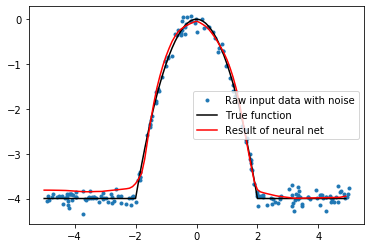

In [14]:
Ylearned2 = model2.predict(Xtest)

plt.plot(Xlearn, Ylearn2, '.', label='Raw input data with noise')
plt.plot(Xtest, Ytest2, label='True function', c='black')
plt.plot(Xtest, Ylearned2, label='Result of neural net', c='red')
plt.legend()

In [34]:
def func3(x):
    y = np.copy(x)
    y[np.where(x<0)] = -1
    y[np.where(x>0)] = 1
    return y
    
Xtest = np.arange(-5, 5, 0.1)
Ytest3 = func3(Xtest)

Xlearn = np.random.uniform(-5, 5, size=(200))
Ylearn3 = func3(Xlearn) + 0.1*np.random.normal(0,1,len(Xlearn))


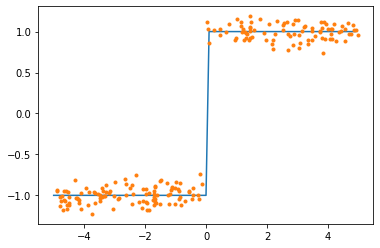

In [35]:
plt.plot(Xtest, Ytest3)
plt.plot(Xlearn, Ylearn3, '.', label='Raw input data with noise')
plt.show()

In [40]:
model3 = Sequential()
model3.add(Dense(8, input_dim=1, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(keras.layers.Dropout(0.2))
model3.add(Dense(128, activation='relu'))
model3.add(keras.layers.Dropout(0.2))
model3.add(Dense(1, activation='linear'))
model3.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [41]:
nepoch = 100
nbatch = 10
model3.fit(Xlearn, Ylearn3, epochs=nepoch, batch_size=nbatch)

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4118 - mse: 0.4118
Epoch 2/100
200/200 [==============================] - 0s 420us/step - loss: 0.2411 - mse: 0.2411
Epoch 3/100
200/200 [==============================] - 0s 359us/step - loss: 0.2154 - mse: 0.2154
Epoch 4/100
200/200 [==============================] - 0s 433us/step - loss: 0.2032 - mse: 0.2032
Epoch 5/100
200/200 [==============================] - 0s 390us/step - loss: 0.2130 - mse: 0.2130
Epoch 6/100
200/200 [==============================] - 0s 458us/step - loss: 0.1594 - mse: 0.1594
Epoch 7/100
200/200 [==============================] - 0s 410us/step - loss: 0.1220 - mse: 0.1220
Epoch 8/100
200/200 [==============================] - 0s 383us/step - loss: 0.1106 - mse: 0.1106
Epoch 9/100
200/200 [==============================] - 0s 515us/step - loss: 0.0898 - mse: 0.0898
Epoch 10/100
200/200 [==============================] - 0s 334us/step - loss: 0.0703 - mse: 0.0703
Epoch 11/100
200/200 

200/200 [==============================] - 0s 512us/step - loss: 0.0218 - mse: 0.0218
Epoch 84/100
200/200 [==============================] - 0s 580us/step - loss: 0.0210 - mse: 0.0210
Epoch 85/100
200/200 [==============================] - 0s 446us/step - loss: 0.0192 - mse: 0.0192
Epoch 86/100
200/200 [==============================] - 0s 340us/step - loss: 0.0189 - mse: 0.0189
Epoch 87/100
200/200 [==============================] - 0s 418us/step - loss: 0.0189 - mse: 0.0189
Epoch 88/100
200/200 [==============================] - 0s 345us/step - loss: 0.0184 - mse: 0.0184
Epoch 89/100
200/200 [==============================] - 0s 355us/step - loss: 0.0168 - mse: 0.0168
Epoch 90/100
200/200 [==============================] - 0s 318us/step - loss: 0.0180 - mse: 0.0180
Epoch 91/100
200/200 [==============================] - 0s 347us/step - loss: 0.0196 - mse: 0.0196
Epoch 92/100
200/200 [==============================] - 0s 302us/step - loss: 0.0190 - mse: 0.0190
Epoch 93/100
200/200 [=

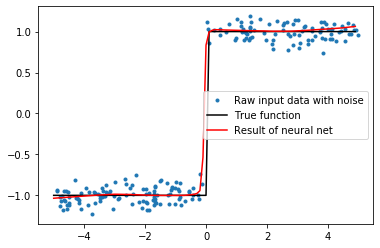

In [42]:
Ylearned3 = model1.predict(Xtest)

plt.plot(Xlearn, Ylearn3, '.', label='Raw input data with noise')
plt.plot(Xtest, Ytest3, label='True function', c='black')
plt.plot(Xtest, Ylearned3, label='Result of neural net', c='red')
plt.legend()

In [56]:
def func3(x):
    y = np.copy(x)
    y[np.where((x<-1))] = -1
    y[np.where((x>0) &(x<1))] = 0
    y[np.where(x>=1)] = 1
    return y
    
Xtest = np.arange(-5, 5, 0.1)
Ytest3 = func3(Xtest)

Xlearn = np.random.uniform(-5, 5, size=(200))
Ylearn3 = func3(Xlearn) + 0.1*np.random.normal(0,1,len(Xlearn))


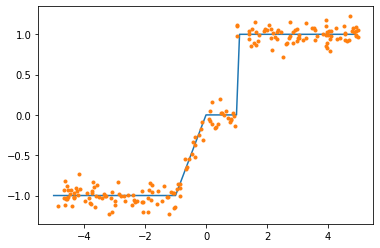

In [58]:
plt.plot(Xtest, Ytest3)
plt.plot(Xlearn, Ylearn3, '.', label='Raw input data with noise')
plt.show()

In [59]:
model3 = Sequential()
model3.add(Dense(8, input_dim=1, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(keras.layers.Dropout(0.2))
model3.add(Dense(128, activation='relu'))
model3.add(keras.layers.Dropout(0.2))
model3.add(Dense(1, activation='linear'))
model3.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [63]:
nepoch = 100
nbatch = 20
model3.fit(Xlearn, Ylearn3, epochs=nepoch, batch_size=nbatch)

Epoch 1/100
200/200 [==============================] - 0s 188us/step - loss: 0.0241 - mse: 0.0241
Epoch 2/100
200/200 [==============================] - 0s 234us/step - loss: 0.0228 - mse: 0.0228
Epoch 3/100
200/200 [==============================] - 0s 277us/step - loss: 0.0203 - mse: 0.0203
Epoch 4/100
200/200 [==============================] - 0s 256us/step - loss: 0.0229 - mse: 0.0229
Epoch 5/100
200/200 [==============================] - 0s 225us/step - loss: 0.0261 - mse: 0.0261
Epoch 6/100
200/200 [==============================] - 0s 261us/step - loss: 0.0228 - mse: 0.0228
Epoch 7/100
200/200 [==============================] - 0s 229us/step - loss: 0.0205 - mse: 0.0205
Epoch 8/100
200/200 [==============================] - 0s 237us/step - loss: 0.0230 - mse: 0.0230
Epoch 9/100
200/200 [==============================] - 0s 235us/step - loss: 0.0248 - mse: 0.0248
Epoch 10/100
200/200 [==============================] - 0s 250us/step - loss: 0.0237 - mse: 0.0237
Epoch 11/100
200/20

200/200 [==============================] - 0s 244us/step - loss: 0.0146 - mse: 0.0146
Epoch 84/100
200/200 [==============================] - 0s 213us/step - loss: 0.0190 - mse: 0.0190
Epoch 85/100
200/200 [==============================] - 0s 158us/step - loss: 0.0190 - mse: 0.0190
Epoch 86/100
200/200 [==============================] - 0s 170us/step - loss: 0.0189 - mse: 0.0189
Epoch 87/100
200/200 [==============================] - 0s 188us/step - loss: 0.0186 - mse: 0.0186
Epoch 88/100
200/200 [==============================] - 0s 193us/step - loss: 0.0181 - mse: 0.0181
Epoch 89/100
200/200 [==============================] - 0s 187us/step - loss: 0.0209 - mse: 0.0209
Epoch 90/100
200/200 [==============================] - 0s 181us/step - loss: 0.0196 - mse: 0.0196
Epoch 91/100
200/200 [==============================] - 0s 240us/step - loss: 0.0215 - mse: 0.0215
Epoch 92/100
200/200 [==============================] - 0s 223us/step - loss: 0.0162 - mse: 0.0162
Epoch 93/100
200/200 [=

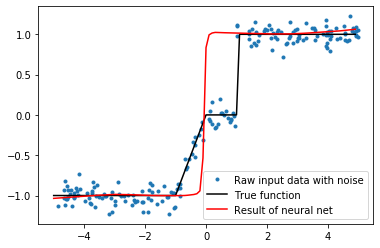

In [64]:
Ylearned3 = model1.predict(Xtest)

plt.plot(Xlearn, Ylearn3, '.', label='Raw input data with noise')
plt.plot(Xtest, Ytest3, label='True function', c='black')
plt.plot(Xtest, Ylearned3, label='Result of neural net', c='red')
plt.legend()